In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Data/Real-Data/Real_Combine.csv')

In [5]:
df.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833


In [6]:
df = df.dropna()
X = df.iloc[:,:-1]  ##Independent Features,
Y = df.iloc[:,-1] ##Dependent Features,

In [7]:
df.corr()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
T,1.000000,0.967276,0.958892,-0.884383,-0.518870,0.622637,0.326067,0.287138,-0.628336
TM,0.967276,1.000000,0.896699,-0.829254,-0.599629,0.598479,0.320116,0.299508,-0.569381
Tm,0.958892,0.896699,1.000000,-0.909514,-0.315305,0.560299,0.312904,0.259431,-0.669059
SLP,-0.884383,-0.829254,-0.909514,1.000000,0.274196,-0.491842,-0.346130,-0.299830,0.615615
H,-0.518870,-0.599629,-0.315305,0.274196,1.000000,-0.475279,-0.399079,-0.370981,0.174658
VV,0.622637,0.598479,0.560299,-0.491842,-0.475279,1.000000,0.402884,0.347493,-0.628621
V,0.326067,0.320116,0.312904,-0.346130,-0.399079,0.402884,1.000000,0.760777,-0.354799
VM,0.287138,0.299508,0.259431,-0.299830,-0.370981,0.347493,0.760777,1.000000,-0.283695
PM 2.5,-0.628336,-0.569381,-0.669059,0.615615,0.174658,-0.628621,-0.354799,-0.283695,1.000000


In [8]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,Y)

ExtraTreesRegressor()

In [9]:
X.head()

,T,TM,Tm,SLP,H,VV,V,VM
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2


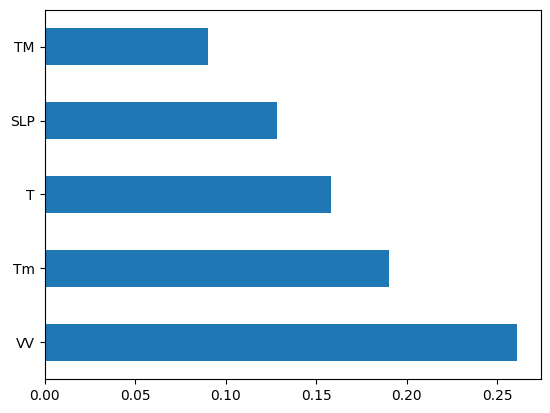

In [10]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=0)


In [12]:
from sklearn.tree import DecisionTreeRegressor
dtree=DecisionTreeRegressor(criterion='squared_error')
dtree.fit(X_train,Y_train)

DecisionTreeRegressor()

In [13]:
# cross validation score
from sklearn.model_selection import cross_val_score
score=cross_val_score(dtree,X,Y,cv=5)
score.mean()

0.09808190615461536

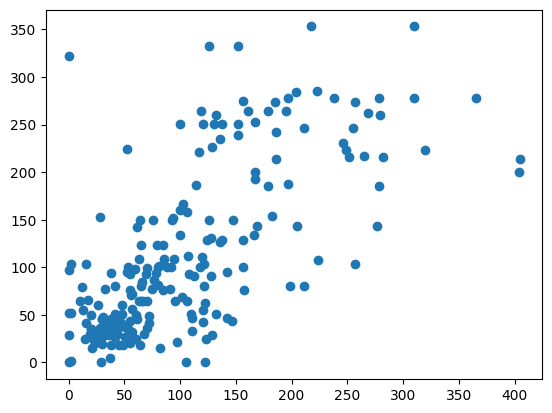

In [14]:
# model prediction
prediction = dtree.predict(X_test)
plt.scatter(Y_test,prediction)

In [15]:
DecisionTreeRegressor()

DecisionTreeRegressor()

In [16]:
## Hyper Parameter Optimization

params={
 "splitter"    : ["best","random"] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_samples_leaf" : [ 1,2,3,4,5 ],
"min_weight_fraction_leaf":[0.1,0.2,0.3,0.4],
 "max_features" : ["auto","log2","sqrt",None ],
    "max_leaf_nodes":[None,10,20,30,40,50,60,70]
    
}

## Hyperparameter optimization using GridSearchCV
from sklearn.model_selection import GridSearchCV

random_search=GridSearchCV(dtree,param_grid=params,scoring='neg_mean_squared_error',n_jobs=-1,cv=10,verbose=3)

def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X,Y)
timer(start_time) # timing ends here for "start_time" variable

Fitting 10 folds for each of 10240 candidates, totalling 102400 fits

 Time taken: 0 hours 1 minutes and 47.39 seconds.


d:\Air-Quality-Prediction-main\.conda\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


In [17]:
# results
predictions=random_search.predict(X_test)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(Y_test, predictions))
print('MSE:', metrics.mean_squared_error(Y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, predictions)))

MAE: 42.71302835883615
MSE: 3641.6768880794675
RMSE: 60.34630799046009
